## 1. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib

## 2. Import data

In [2]:
path = r'C:\Users\Niklas Winter\Layoffs Analyse'

In [3]:
# 2.Importing data set Layoffs
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'layoffs_clean.csv'))


In [4]:
matplotlib.__version__

'3.5.2'

In [5]:
%matplotlib inline

In [38]:
from sklearn.preprocessing import LabelEncoder

# create a copy of the original dataframe
df_corr = df.copy()

# instantiate the LabelEncoder class
le = LabelEncoder()

# encode the categorical columns
df_corr['Country'] = le.fit_transform(df_corr['Country'])
df_corr['Industry'] = le.fit_transform(df_corr['Industry'])
df_corr['Location'] = le.fit_transform(df_corr['Location'])

In [74]:
df_corr.head()

,Company,Location,Industry,Laid_Off_Count,Date,Stage,Country,Percentage
0,GoTo Group,Jakarta,Transportation,600.0,2023-03-10,Post-IPO,Indonesia,0.18
1,Xero,Wellington,Finance,800.0,2023-03-09,Post-IPO,New Zealand,0.15
2,Shopee,Jakarta,Food,200.0,2023-03-09,Unknown,Indonesia,0.18
3,Gopuff,Philadelphia,Food,100.0,2023-03-09,Series H,United States,0.02
4,Wave Financial,Toronto,Finance,50.0,2023-03-09,Acquired,Canada,0.18


In [41]:
# Create a correlation matrix using pandas

df_corr.corr()

,Location,Industry,Laid_Off_Count,Country,Percentage
Location,1.000000,-0.013353,0.008925,0.055436,-0.028613
Industry,-0.013353,1.000000,0.013383,0.037929,-0.032999
Laid_Off_Count,0.008925,0.013383,1.000000,0.025706,-0.050264
Country,0.055436,0.037929,0.025706,1.000000,-0.009393
Percentage,-0.028613,-0.032999,-0.050264,-0.009393,1.000000


In [42]:
df_corr.head()

,Company,Location,Industry,Laid_Off_Count,Date,Stage,Country,Percentage
0,GoTo Group,79,27,600.0,2023-03-10,Post-IPO,23,0.18
1,Xero,185,7,800.0,2023-03-09,Post-IPO,35,0.15
2,Shopee,79,9,200.0,2023-03-09,Unknown,23,0.18
3,Gopuff,135,9,100.0,2023-03-09,Series H,56,0.02
4,Wave Financial,175,7,50.0,2023-03-09,Acquired,7,0.18


In [43]:
df_corr.corr()

,Location,Industry,Laid_Off_Count,Country,Percentage
Location,1.000000,-0.013353,0.008925,0.055436,-0.028613
Industry,-0.013353,1.000000,0.013383,0.037929,-0.032999
Laid_Off_Count,0.008925,0.013383,1.000000,0.025706,-0.050264
Country,0.055436,0.037929,0.025706,1.000000,-0.009393
Percentage,-0.028613,-0.032999,-0.050264,-0.009393,1.000000


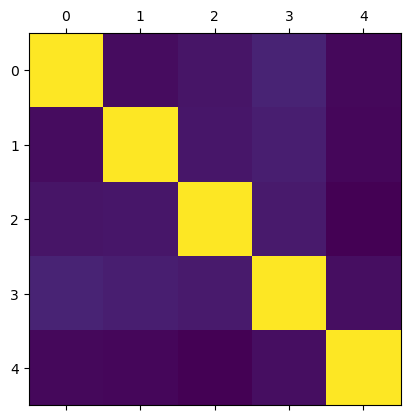

In [44]:
plt.matshow(df_corr.corr())
plt.show()

In [58]:
grouped_country = df.groupby('Country')['Laid_Off_Count'].sum()
df_grouped_country = pd.DataFrame({'Country': grouped_country.index, 'Laid_Off_Count': grouped_country.values})
corr = df_grouped_country.corr()
print(corr)

                Laid_Off_Count
Laid_Off_Count             1.0


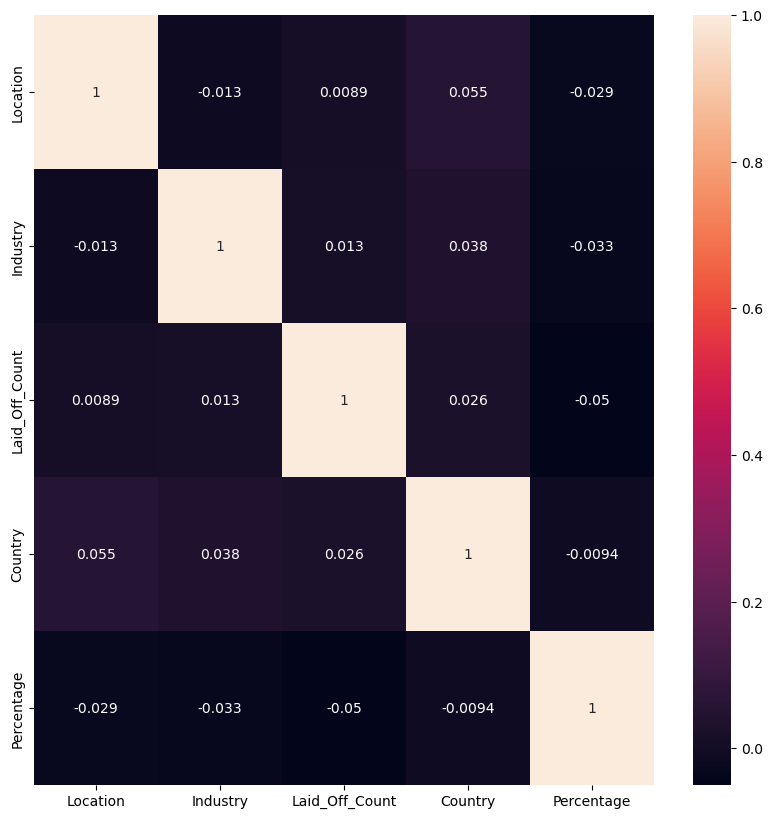

In [60]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr1 = sns.heatmap(df_corr.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [54]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         2346 non-null   object 
 1   Location        2346 non-null   int32  
 2   Industry        2346 non-null   int32  
 3   Laid_Off_Count  2346 non-null   float64
 4   Date            2346 non-null   object 
 5   Stage           2346 non-null   object 
 6   Country         2346 non-null   int32  
 7   Percentage      2346 non-null   float64
dtypes: float64(2), int32(3), object(3)
memory usage: 119.3+ KB


### Observation: According to the heatmap, no correlation exists.

Text(0.5, 1.0, 'Correlation Matrix')

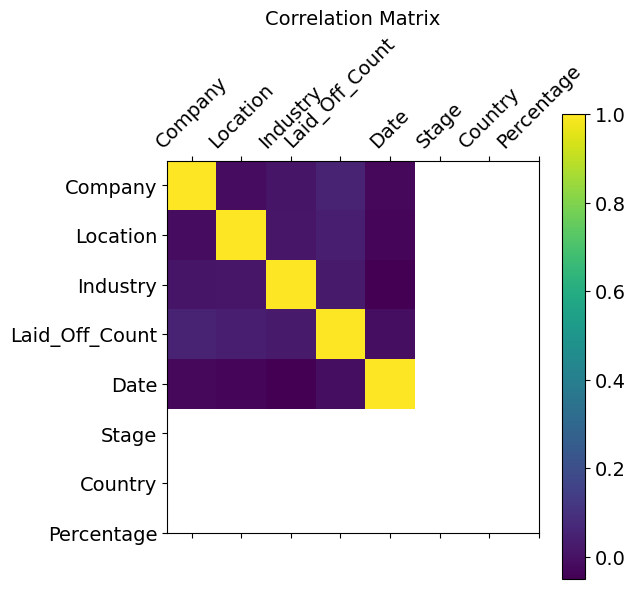

In [90]:
f = plt.figure(figsize=(6,6 )) # figure size 
plt.matshow(df_num.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df_num.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df_num.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

### There is no significant correlation, which is not suprising

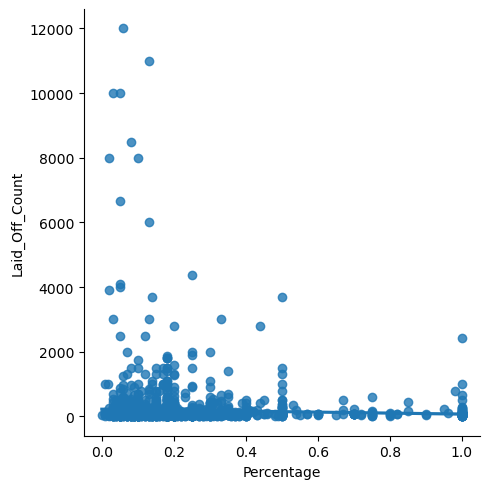

In [12]:
sns.lmplot(x = 'Percentage', y = 'Laid_Off_Count', data = df)


### Observation: The result is not intuitive - for the companies with the highest number of laid off employees, this number is at the same time the lowest percentage of the staff. That means, that obviosly huge companies show the largest numbers of fired staff.
### The largest company that got bancrupt (Percentage = 1) has not more than around 2000 employees.

In [61]:
sub = df_corr[['Company', 'Industry', 'Country', 'Laid_Off_Count', 'Percentage']]

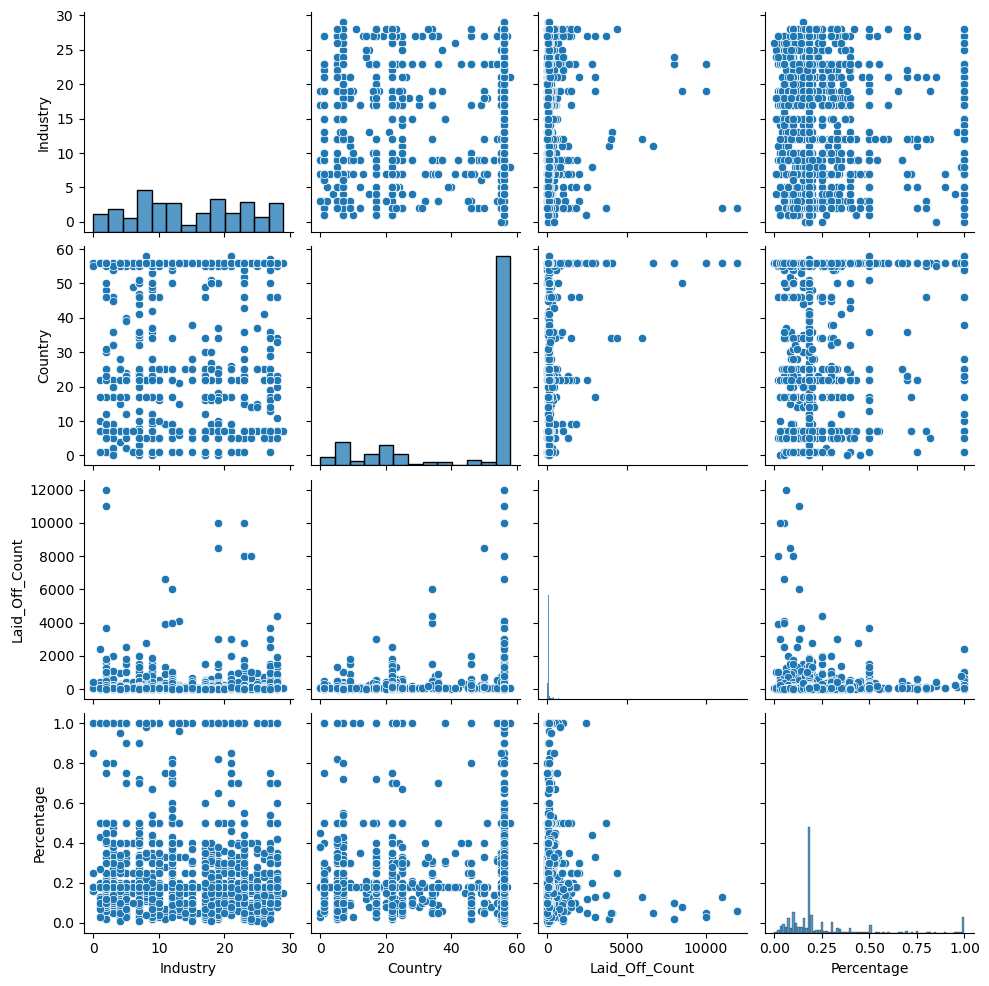

In [62]:
# Creation of a pair plot

g = sns.pairplot(sub)

### Observation: The most companies lost around 0,25 % of their staff; A minority of 10 companies laid off more than 5000 employees in the observied time.

C:\Users\Niklas Winter\AppData\Local\Temp\ipykernel_39044\1288460138.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(industry_dict.values()))


Text(24.000000000000007, 0.5, 'Frequency')

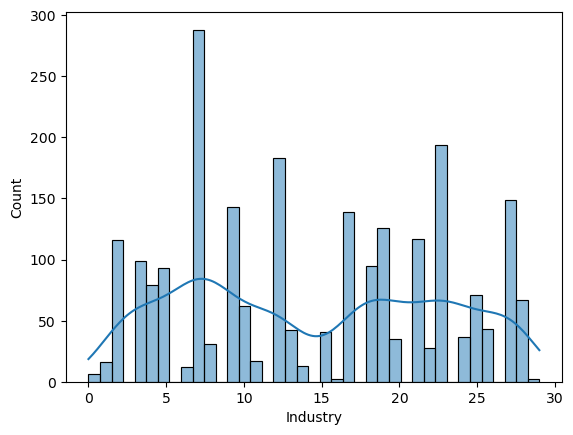

In [92]:
# Use a histogram to visualize the distribution of the variables. 
sns.histplot(df_num['Industry'], bins = 39, kde = True)
ax.set_xticklabels(list(industry_dict.values()))
# Set the plot title and axis labels
ax.set_title('Industry')
ax.set_xlabel('Laid Off Count')
ax.set_ylabel('Frequency')

### Observation: Industry "Finance" shows a high frequency of layoffs, followed from Retail 

In [86]:
industry_dict

{0: 'Aerospace',
 1: 'Construction',
 2: 'Consumer',
 3: 'Crypto',
 4: 'Data',
 5: 'Education',
 6: 'Energy',
 7: 'Finance',
 8: 'Fitness',
 9: 'Food',
 10: 'HR',
 11: 'Hardware',
 12: 'Healthcare',
 13: 'Infrastructure',
 14: 'Legal',
 15: 'Logistics',
 16: 'Manufacturing',
 17: 'Marketing',
 18: 'Media',
 19: 'Other',
 20: 'Product',
 21: 'Real Estate',
 22: 'Recruiting',
 23: 'Retail',
 24: 'Sales',
 25: 'Security',
 26: 'Support',
 27: 'Transportation',
 28: 'Travel',
 29: 'Unknown'}

In [16]:
# Safe Visualization
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Histplot_percentage_count_laidoff.png'))

<Figure size 640x480 with 0 Axes>

In [17]:
df.head()

,Company,Location,Industry,Laid_Off_Count,Date,Stage,Country,Percentage
0,GoTo Group,Jakarta,Transportation,600.0,2023-03-10,Post-IPO,Indonesia,0.18
1,Xero,Wellington,Finance,800.0,2023-03-09,Post-IPO,New Zealand,0.15
2,Shopee,Jakarta,Food,200.0,2023-03-09,Unknown,Indonesia,0.18
3,Gopuff,Philadelphia,Food,100.0,2023-03-09,Series H,United States,0.02
4,Wave Financial,Toronto,Finance,50.0,2023-03-09,Acquired,Canada,0.18


<AxesSubplot:>

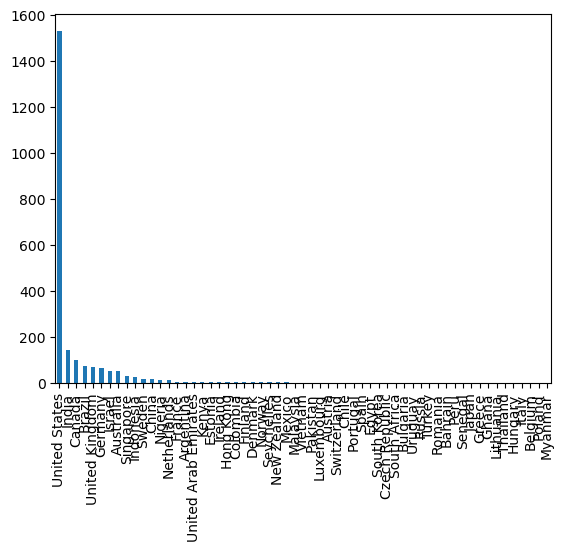

In [18]:
df['Country'].value_counts().plot.bar()

### Observation: The United States seem to cause the majority of the fired staff.

In [19]:
# Get the top 20 countries by count
top_20_countries = df['Country'].value_counts().nlargest(20)

Text(0, 0.5, 'Count')

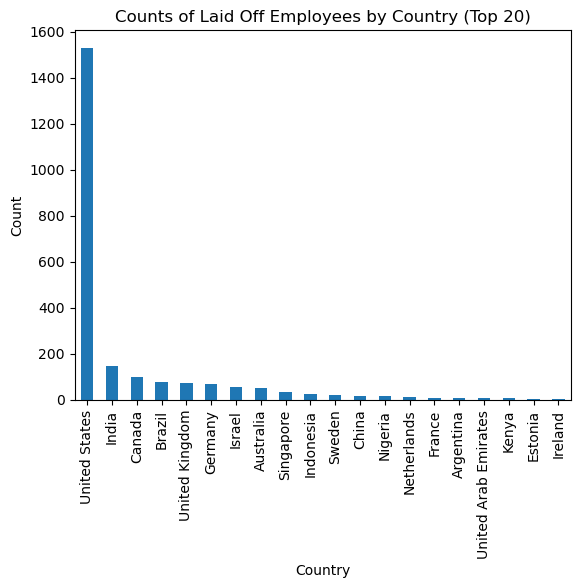

In [20]:
# Create the bar plot
ax = top_20_countries.plot.bar()
# Set the plot title and axis labels
ax.set_title('Counts of Laid Off Employees by Country (Top 20)')
ax.set_xlabel('Country')
ax.set_ylabel('Count')

In [21]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Country_barplot_top20.png'))

<Figure size 640x480 with 0 Axes>

<AxesSubplot:>

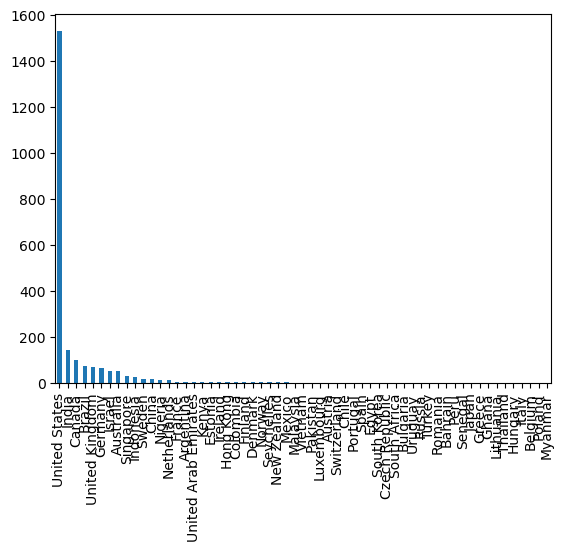

In [22]:
df['Country'].value_counts().plot.bar()

<AxesSubplot:>

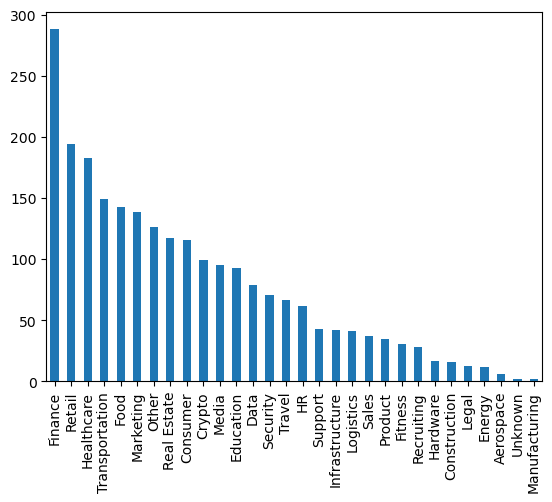

In [23]:
df['Industry'].value_counts().plot.bar()

In [24]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Industry_barplot.png'))

<Figure size 640x480 with 0 Axes>

In [25]:
# Get the top 20 companies by count
top_20_companies = df['Company'].value_counts().nlargest(20)


In [26]:
company_counts = df.groupby('Company')['Laid_Off_Count'].sum()

In [27]:
# Sort the values in descending order and take the top 20
top_20_companies = company_counts.sort_values(ascending=False)[:20]

Text(0, 0.5, 'Laid Off Count')

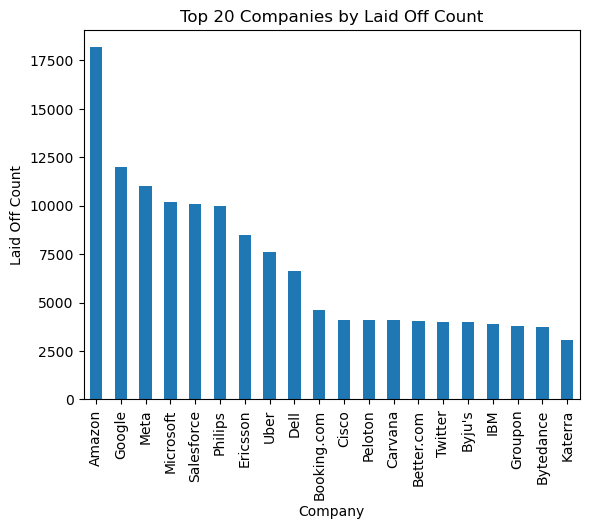

In [28]:
# Create a bar plot of the top 20 companies and their 'Laid_Off_Count' values
ax = top_20_companies.plot(kind='bar')
# Set the plot title and axis labels
ax.set_title('Top 20 Companies by Laid Off Count')
ax.set_xlabel('Company')
ax.set_ylabel('Laid Off Count')

<AxesSubplot:xlabel='Company'>

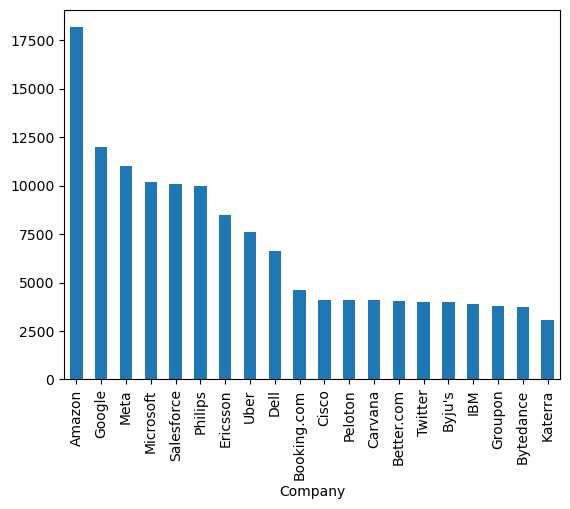

In [29]:
top_20_companies.plot.bar()

## Hypothesis

### The COVID-19 pandemic has significantly increased the number of layoffs across various industries worldwide. Specifically, industries such as hospitality, transportation, and retail are expected to have a higher number of layoffs due to the pandemic-induced economic downturn.

### Companies in the technology industry are less likely to lay off employees compared to companies in other industries. Explanation: The technology industry is known for its fast-paced growth and innovation, and companies in this industry may be more likely to invest in their employees to maintain their competitive edge.

### The COVID-19 pandemic has significantly impacted the number of layoffs in the United States, and this impact is reflected in the dataset.

### The industry sector in which a company operates influences the likelihood of layoffs.

### The likelihood of layoffs varies based on the geographic location of a company.

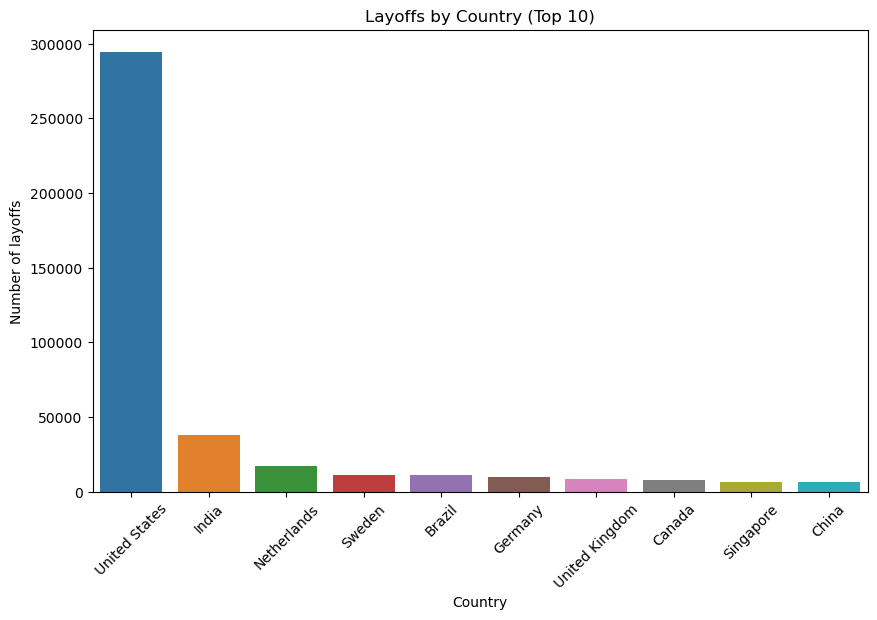

In [31]:
# Group by country and sum the layoffs
layoffs_by_country = df.groupby('Country')['Laid_Off_Count'].sum()

# Sort by descending order of layoffs and keep only the top 10 countries
top_10_countries = layoffs_by_country.sort_values(ascending=False)[:10]

# Create a bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values)
plt.title('Layoffs by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Number of layoffs')
plt.xticks(rotation=45)
plt.show()

In [32]:
# Perform one-hot encoding on the 'Country' variable
country_dummies = pd.get_dummies(df['Country'], prefix='Country')

# Concatenate the encoded variables with the original dataframe
df_encoded = pd.concat([df, country_dummies], axis=1)

# Calculate the correlation matrix between the encoded variables and the 'Laid_Off_Count' variable
corr_matrix = df_encoded.corr()['Laid_Off_Count'].sort_values(ascending=False)

print(corr_matrix)

Laid_Off_Count            1.000000
Country_Netherlands       0.134807
Country_Sweden            0.056406
Country_India             0.028574
Country_China             0.024612
                            ...   
Country_United Kingdom   -0.019466
Country_Australia        -0.025361
Country_Israel           -0.025458
Country_Canada           -0.036233
Percentage               -0.050264
Name: Laid_Off_Count, Length: 61, dtype: float64


In [75]:
# Create dummy variables for categorical columns
dummy_cols = ['Country', 'Industry', 'Location']
df_dummies = pd.get_dummies(df[dummy_cols])

# Concatenate dummy variables with original DataFrame
df_concat = pd.concat([df, df_dummies], axis=1)

# Calculate correlation matrix
corr_matrix = df_concat[['Laid_Off_Count'] + list(df_dummies.columns)].corr()

In [83]:
from sklearn.preprocessing import LabelEncoder

# create a copy of the original dataframe
df_num = df.copy()

# instantiate the LabelEncoder class
le = LabelEncoder()

# encode the categorical columns
df_num['Country'] = le.fit_transform(df_num['Country'])
df_num['Industry'] = le.fit_transform(df_num['Industry'])
df_num['Location'] = le.fit_transform(df_num['Location'])

In [94]:
#Export data
df_num.to_csv(os.path.join(path, '02 Data','Prepared Data', 'layoffs_num.csv'))
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'layoffs_clean.csv'))